In this blog post, we will look at the vibrating string equation and solve it using two different mathematical methods.
First, we will use a time-domain finite difference method. In a second step, we will use a frequency domain approach (i.e. a Fourier method) to solve the same problem. 

I wrote this post while going through the excellent MOOC Fundamentals of Waves and Vibrations. Feel free to check out  what I wrote about the experience [here](http://flothesof.github.io/anki-MOOC-fundamentals-waves-vibrations.html).

# The vibrating string equation 

Let's start by introducing the [vibrating string](https://en.wikipedia.org/wiki/String_vibration) equation.

The equation of the transverse displacement of a vibrating string $y(x,t)$ is, $\forall x \in [0, L]$, $\forall t \geq 0$:

$$
m \dfrac{\partial^2 y}{\partial t^2} - T \dfrac{\partial^2 y}{\partial x^2} = 0
$$

We will solve this with so-called Dirichlet boundary conditions, meaning that the string has a zero displacement at its ends, i.e. $\forall t \geq 0 \; y(0, t) = y(L, t) = 0$. Initial conditions will be as follows:

- $\forall x \in [0, L], \quad y(x, 0) = y_0(x)$
- $\forall x \in [0, L], \quad \dot{y}(x, 0) = 0$

# Time-domain solution 

Let's implement a time-domain solution known as finite differences. The partial differential equation above, once discretized on a 1D grid, becomes:

$$
m \dfrac{y_i^{n+1} - 2 y_i^{n} + y_i^{n-1}}{\Delta t^2} - T \dfrac{y_{i+1}^{n} - 2 y_{i}^{n} + y_{i-1}^{n}}{\Delta x^2} = 0
$$

After reordering the terms, we obtain the following *propagation step*:

$$
\forall i \in [1, N-1] \quad y_i^{n+1} = 2 y_i^{n} - y_i^{n-1} + \dfrac{T}{m} \dfrac{\Delta t^2}{\Delta x^2} \left ( y_{i+1}^{n} - 2 y_{i}^{n} + y_{i-1}^{n}\right )
$$


We can setup a simple implementation of the solution as follows:

In [1]:
import numpy as np

class TimeDomainSolver:
    
    def __init__(self, L, nx, T, m, y0):
        """Setup of the time domain solver."""
        self.x = np.linspace(0, L, num=nx)
        self.dx = self.x[1] - self.x[0]
        c = np.sqrt(T/m)
        self.dt = self.dx / c
        self.uprev = y0(self.x)
        self.ucurr = y0(self.x)
        self.alpha = T / m * self.dt ** 2 / self.dx **2
        
        
    def step(self):
        """Steps the system forward in time."""
        unext = np.zeros_like(self.ucurr)
        unext[1: -1] = 2 * self.ucurr[1:-1] - self.uprev[1:-1] + \
                        self.alpha * (self.ucurr[2:] - 2 * self.ucurr[1:-1] + self.ucurr[:-2])
        self.ucurr, self.uprev = unext, self.ucurr
        
    def steps(self, n):
        for _ in range(n):
            self.step()

To test our implementation, we will consider a triangular initial string with the properties of a low E string of a guitar (such as those that you can find on the back of electric guitar strings, as [here](http://www.daddario.com/DAstringtensionguide.Page?sid=91901025-4136-404a-8c26-e020667e8b5e)).

In [2]:
L = 0.6477 # m
T = 7.93 * 9.81 # kg * m.s^-2
f0 = 82.4 # Hz
c = 2 * L * f0
m = T / c**2

triangle = lambda x: (x * 2 / L) * (x < L/2) + (-x * 2 / L + 2) * (x >= L/2) 

td_solver = TimeDomainSolver(L, 200, T, m, triangle)

Let's visualize the initial position of the string:

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
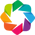

In [3]:
import holoviews as hv
hv.extension('bokeh')
hv.opts.defaults(hv.opts.Curve(width=500))

In [4]:
hv.Curve((td_solver.x, td_solver.uprev))

:Curve   [x]   (y)

We can now step the system and see how the string deforms.

In [5]:
td_solver.steps(10)

hv.Curve((td_solver.x, td_solver.ucurr)).redim.range(y=(-1, 1))

:Curve   [x]   (y)

Let's animate this:

In [6]:
%%output holomap='scrubber'
snapshots = []
td_solver = TimeDomainSolver(L, 200, T, m, triangle)
for _ in range(41):
    snapshots.append(td_solver.ucurr.copy())
    td_solver.steps(10)

td_hmap = hv.HoloMap({i: hv.Curve((td_solver.x, snapshots[i]), label='time domain') for i in range(len(snapshots))}, kdims=['snapshot'])
td_hmap

:HoloMap   [snapshot]
   :Curve   [x]   (y)

We can observe that the vibrations of the string keeps the initial triangular shape and that this shape repeats after some time. In fact, this is a particular wave we are observing: a [standing wave](https://en.wikipedia.org/wiki/Standing_wave). This is due to the symmetry in the way we have formulated this problem.

Now on to the frequency domain solution.

# Frequency domain solution 

In the frequency domain, the solution is written as follows: 
$$
y(x,t)=\sum_{n=0}^\infty B_{n}\sin \left(n\pi {x \over L}\right)\cos \left(n\pi {c t \over L}\right)
$$
where 
$$
B_{n}={2 \over L}\int _{{0}}^{{L}}f(x)\sin \left(n\pi {x \over L}\right){\mathrm  d}x.
$$

Let's use this to compute a frequency domain solver that operates with a truncated number of modes. We will keep a similar time step for animation since this will allow us to exactly compare the outcome of the simulation between our two solvers.

In [9]:
class FrequencyDomainSolver:
    
    def __init__(self, L, nx, T, m, y0, nmodes):
        """Setup of the time domain solver."""
        self.x = np.linspace(0, L, num=nx)
        self.L = L
        self.dx = self.x[1] - self.x[0]
        c = np.sqrt(T/m)
        self.c = c
        self.dt = self.dx / c
        self.t = 0.
        self.uprev = y0(self.x)
        self.ucurr = y0(self.x)
        self.alpha = T / m * self.dt ** 2 / self.dx **2
        self.nmodes = nmodes
        self.Bn = []
        for n in range(nmodes):
            self.Bn.append(2/L * np.trapz(y0(self.x) * np.sin(n * np.pi * self.x / L), self.x))
        
        
    def step(self):
        """Steps the system forward in time."""
        unext = np.zeros_like(self.ucurr)
        self.t += self.dt
        for n, Bn in zip(range(self.nmodes), self.Bn):
            unext += Bn * np.sin(n * np.pi * self.x / self.L) * np.cos(n * np.pi * self.c / self.L * self.t)
        self.ucurr, self.uprev = unext, self.ucurr
        
    def steps(self, n):
        for _ in range(n):
            self.step()

In [10]:
fd_solver = FrequencyDomainSolver(L, 200, T, m, triangle, nmodes=10)

fd_solver.steps(10)

hv.Curve((td_solver.x, fd_solver.ucurr)).redim.range(y=(-1, 1))

:Curve   [x]   (y)

In [11]:
%%output holomap='scrubber'
snapshots = []
fd_solver = FrequencyDomainSolver(L, 200, T, m, triangle, nmodes=10)
for _ in range(41):
    snapshots.append(fd_solver.ucurr.copy())
    fd_solver.steps(10)

fd_hmap = hv.HoloMap({i: hv.Curve((fd_solver.x, snapshots[i]), label='frequency domain') for i in range(len(snapshots))}, kdims=['snapshot'])
fd_hmap

:HoloMap   [snapshot]
   :Curve   [x]   (y)

The solution obtained with this approach looks a lot like the previous. Except for the fact that the string looks less triangular than before! This is due to the fact that the infinite sum of modes has been replaced by a truncated sum.

Let's superpose the obtained figures for comparison.

# Comparison of both methods 

In [12]:
%%output holomap='scrubber'
fd_hmap * td_hmap

:HoloMap   [snapshot]
   :Overlay
      .Curve.Frequency_domain :Curve   [x]   (y)
      .Curve.Time_domain      :Curve   [x]   (y)

## More modes 

We can get a more accurate solution in the frequency domain if we put more modes into it, i.e. if we truncate the sum at a larger number of modes.

In [13]:
snapshots = []
fd_solver = FrequencyDomainSolver(L, 200, T, m, triangle, nmodes=100)
for _ in range(41):
    snapshots.append(fd_solver.ucurr.copy())
    fd_solver.steps(10)

fd_hmap2 = hv.HoloMap({i: hv.Curve((fd_solver.x, snapshots[i]), label='frequency domain') for i in range(len(snapshots))}, kdims=['snapshot'])

In [14]:
%%output holomap='scrubber'
fd_hmap2 * td_hmap

:HoloMap   [snapshot]
   :Overlay
      .Curve.Frequency_domain :Curve   [x]   (y)
      .Curve.Time_domain      :Curve   [x]   (y)

Indeed, by adding more modes to the frequency domain model, the result is more accurate (considering that the time domain solution as the reference).

## Longer simulation times 

Another way of comparing these two approaches is to see what happens for very long simulation times.

In [15]:
fd_solver = FrequencyDomainSolver(L, 200, T, m, triangle, nmodes=100)
fd_solver.steps(10000)

In [16]:
td_solver = TimeDomainSolver(L, 200, T, m, triangle)
factor = .01
td_solver.alpha = td_solver.alpha * factor**2 
td_solver.steps(int(1/factor * 10000))

In [17]:
hv.Curve((td_solver.x, td_solver.ucurr), label='time domain').redim.range(y=(0, .6)) * \
                        hv.Curve((fd_solver.x, fd_solver.ucurr), label='frequency domain')

:Overlay
   .Curve.Time_domain      :Curve   [x]   (y)
   .Curve.Frequency_domain :Curve   [x]   (y)

In the above plot, we see that the time domain solution is now pretty wigly. This phenomenom is a natural artifact of the simulated string and is called *numerical dispersion*. Here, the frequency domain solution is more trustworthy since it is a closed-form sum and does not accumulate small errors due to many updates of a numerical value. 

This is an important argument for choosing one or the other model in engineering applications. 

# Conclusions

It's all about tradeoffs. In the physics application that I use every day at work, it seems that each community has its preferred method and numerical strategy, which in a very broad way boils down to choosing time-domain or frequency-domain as your method to solve a wave propagation problem.  

Another question is: is this realistic? That is a difficult question, and to try to answer that we could have a look at YouTube, where one can find some realistic videos from guitars.

In [18]:
from IPython.display import YouTubeVideo

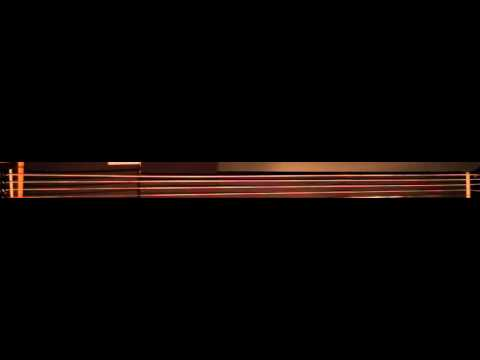

In [19]:
YouTubeVideo('MZ1O1JkL5Dw')

# Bonus 

What happens if we excite the string with "half a triangle", a triangle on half of its side?

In [20]:
half_triangle = lambda x: (x * 4 / L) * (x < L/4) + (-x * 4 / L + 2) * (x >= L/4) + -(-x * 4 / L + 2) * (x >= L/2)

In [21]:
%%output holomap='scrubber'
snapshots = []
td_solver = TimeDomainSolver(L, 400, T, m, half_triangle)
for _ in range(80):
    snapshots.append(td_solver.ucurr.copy())
    td_solver.steps(20)

td_hmap = hv.HoloMap({i: hv.Curve((td_solver.x, snapshots[i]), label='time domain') for i in range(len(snapshots))}, kdims=['snapshot'])
td_hmap

:HoloMap   [snapshot]
   :Curve   [x]   (y)

*This post was entirely written using the IPython notebook. Its content is BSD-licensed. You can see a static view or download this notebook with the help of nbviewer at [20190328_vibratingStringTimeFrequency.ipynb](http://nbviewer.ipython.org/urls/raw.github.com/flothesof/posts/master/20190328_vibratingStringTimeFrequency.ipynb).*